<a href="https://colab.research.google.com/github/Shereen74/graduation_project/blob/main/LSTM_GP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/GP

/content/drive/MyDrive/GP


In [2]:
!pwd

/content/drive/MyDrive/GP


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# I trained 1 model on the non-scaled features and the others with the scaled features to compare the accuracy between them
# So I had to read all these files
# train_daily_x = pd.read_csv('./train_daily_x.csv', keep_default_na=False, index_col=None)
train_daily_y = pd.read_csv('./train_daily_y.csv', keep_default_na=False, index_col=None)
# test_daily_x = pd.read_csv('./test_daily_x.csv', keep_default_na=False, index_col=None)
test_daily_y = pd.read_csv('./test_daily_y.csv', keep_default_na=False, index_col=None)

train_x_scaled = pd.read_csv('./train_x_scaled.csv', keep_default_na=False, index_col=None)
test_x_scaled = pd.read_csv('./test_x_scaled.csv', keep_default_na=False, index_col=None)

In [10]:
test_daily_x = pd.read_csv('./test_daily_x.csv', keep_default_na=False, index_col=None)

In [6]:
train_daily_x

,site_id,day,month,building_id,meter,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,...,primary_use_Office,primary_use_Other,primary_use_Parking,primary_use_Public services,primary_use_Religious worship,primary_use_Retail,primary_use_Services,primary_use_Technology/science,primary_use_Utility,primary_use_Warehouse/storage
0,0,1,1,0,0,7432.0,25.0,6.000000,20.0,-0.173913,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,2720.0,25.0,6.000000,20.0,-0.173913,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,2,0,5376.0,25.0,6.000000,20.0,-0.173913,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,3,0,23685.0,25.0,6.000000,20.0,-0.173913,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,4,0,116607.0,25.0,6.000000,20.0,-0.173913,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13346740,15,31,8,1444,0,19619.0,22.8,0.363636,17.8,-0.198697,...,0,0,0,0,0,0,0,0,0,0
13346741,15,31,8,1445,0,4298.0,22.8,0.363636,17.8,-0.198697,...,0,0,0,0,0,0,0,0,0,0
13346742,15,31,8,1446,0,11265.0,22.8,0.363636,17.8,-0.198697,...,0,0,0,0,0,0,0,0,0,0
13346743,15,31,8,1447,0,29775.0,22.8,0.363636,17.8,-0.198697,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_daily_y.mean()

meter_reading_log1p    4.082807
dtype: float64

In [7]:
# Print the new scaled dataset
train_x_scaled

,site_id,day,month,building_id,meter,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,...,primary_use_Office,primary_use_Other,primary_use_Parking,primary_use_Public services,primary_use_Religious worship,primary_use_Retail,primary_use_Services,primary_use_Technology/science,primary_use_Utility,primary_use_Warehouse/storage
0,0,1,1,0,0,-0.855349,0.729145,1.395256,1.143738,-0.180916,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,-0.895519,0.729145,1.395256,1.143738,-0.180916,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,2,0,-0.872876,0.729145,1.395256,1.143738,-0.180916,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,3,0,-0.716791,0.729145,1.395256,1.143738,-0.180916,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,4,0,0.075371,0.729145,1.395256,1.143738,-0.180916,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13346740,15,31,8,1444,0,-0.751454,0.534507,-0.796664,0.935660,-0.184137,...,0,0,0,0,0,0,0,0,0,0
13346741,15,31,8,1445,0,-0.882066,0.534507,-0.796664,0.935660,-0.184137,...,0,0,0,0,0,0,0,0,0,0
13346742,15,31,8,1446,0,-0.822672,0.534507,-0.796664,0.935660,-0.184137,...,0,0,0,0,0,0,0,0,0,0
13346743,15,31,8,1447,0,-0.664874,0.534507,-0.796664,0.935660,-0.184137,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_x_scaled

,site_id,day,month,building_id,meter,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,...,primary_use_Office,primary_use_Other,primary_use_Parking,primary_use_Public services,primary_use_Religious worship,primary_use_Retail,primary_use_Services,primary_use_Technology/science,primary_use_Utility,primary_use_Warehouse/storage
0,0,1,9,0,0,-0.855349,0.676061,2.173034,1.455856,-0.288267,...,0,0,0,0,0,0,0,0,0,0
1,0,1,9,1,0,-0.895519,0.676061,2.173034,1.455856,-0.288267,...,0,0,0,0,0,0,0,0,0,0
2,0,1,9,2,0,-0.872876,0.676061,2.173034,1.455856,-0.288267,...,0,0,0,0,0,0,0,0,0,0
3,0,1,9,3,0,-0.716791,0.676061,2.173034,1.455856,-0.288267,...,0,0,0,0,0,0,0,0,0,0
4,0,1,9,4,0,0.075371,0.676061,2.173034,1.455856,-0.288267,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851784,15,31,12,1444,0,-0.751454,-1.332247,-0.160300,-1.277535,-0.288267,...,0,0,0,0,0,0,0,0,0,0
6851785,15,31,12,1445,0,-0.882066,-1.332247,-0.160300,-1.277535,-0.288267,...,0,0,0,0,0,0,0,0,0,0
6851786,15,31,12,1446,0,-0.822672,-1.332247,-0.160300,-1.277535,-0.288267,...,0,0,0,0,0,0,0,0,0,0
6851787,15,31,12,1447,0,-0.664874,-1.332247,-0.160300,-1.277535,-0.288267,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_daily_y

,meter_reading_log1p
0,4.331021
1,3.746486
2,1.818324
3,4.821378
4,6.138452
...,...
6851784,2.277267
6851785,1.762159
6851786,0.000000
6851787,5.078761


# Importing Libraries

In [19]:
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError, MeanAbsoluteError, MeanSquaredLogarithmicError, MeanSquaredError
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score, mean_squared_log_error, mean_absolute_error
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras import regularizers
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [ ]:
train_daily_x

,meter,building_id,Month,Day,site_id,air_temperature,wind_speed,precip_depth_1_hr,cloud_coverage,sea_level_pressure,...,primary_use_Office,primary_use_Other,primary_use_Parking,primary_use_Public services,primary_use_Religious worship,primary_use_Retail,primary_use_Services,primary_use_Technology/science,primary_use_Utility,primary_use_Warehouse/storage
0,0,0,1,1,0,0.712774,-0.963826,-0.410977,2.596133,0.422406,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,2,0,0.344816,0.346012,-0.388825,2.841984,0.427575,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,3,0,-0.111097,1.025969,-0.131158,2.917019,0.179512,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,4,0,-0.320494,0.572664,-0.057538,2.208510,-0.068730,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,5,0,-0.185737,1.821887,-0.352016,1.475106,0.975027,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558821,3,1331,8,27,15,0.505394,-1.469841,-0.000226,1.412518,0.948531,...,0,0,0,0,0,0,0,0,0,0
558822,3,1331,8,28,15,0.694973,-0.218575,0.831738,1.470957,0.885750,...,0,0,0,0,0,0,0,0,0,0
558823,3,1331,8,29,15,0.581600,-0.057810,-0.000226,2.096133,0.910950,...,0,0,0,0,0,0,0,0,0,0
558824,3,1331,8,30,15,0.155947,-1.214790,-0.000226,0.412518,0.905137,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_daily_y.tail()

,meter_reading
558821,36565.135
558822,30105.365
558823,31894.723
558824,38986.637
558825,37778.410


In [ ]:
train_daily_x

# Simple Pre-processing

As the LSTM accepts ONLY 3D shaped array data (this step is also done when we need to make future predictions using the test set).
1. Convert into array  
2. 3D will be: (train_samples, window_size, no_of_features)
- train_samples: is the number of training samples (rows).
- window_size: is the number of time steps or window size.
- no_of_features: is the number of features in each time step.

Use train_test_split() to divide the train data into train and validation sets (Non-scaled)

In [ ]:
# Splitting train_x --> train_x, x_val
# Splitting train_y --> train_y, y_val
train_daily_x, x_val, train_daily_y, y_val = train_test_split(train_daily_x, train_daily_y, test_size=0.2, shuffle=False)

## Reshaping train and test data into 3D array (Non-scaled)

In [64]:
# [1]---Converting the dataframe -> array
# Train
train_daily_x_arr = train_daily_x.values[:]

# Test
test_daily_x_arr = test_daily_x.values[:]

# Validation of train set
x_val = x_val.values[:]

# [2]---Reshaping the array -> 3D array
# Train
train_daily_x_3D = train_daily_x_arr.reshape((train_daily_x.shape[0], 1, train_daily_x.shape[-1]))

# Test
test_daily_x_3D = test_daily_x_arr.reshape((test_daily_x.shape[0], 1, test_daily_x.shape[-1]))
    
# Validation of train set
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[-1]))

Use train_test_split() to divide the train data into train and validation sets (Scaled)

In [6]:
# Splitting train_x --> train_x, x_val
# Splitting train_y --> train_y, y_val
train_x_scaled, x_val, train_daily_y, y_val = train_test_split(train_x_scaled, train_daily_y, test_size=0.2, shuffle=False)

## Reshaping train & test data into 3D array (scaled)

In [7]:
# [1]---Converting the dataframe -> array
# Train
train_x_scaled_arr = train_x_scaled.values[:]

# Test
test_x_scaled_arr = test_x_scaled.values[:]

# Validation of train set
x_val = x_val.values[:]

# [2]---Reshaping the array -> 3D array
# Train
train_x_scaled_3D = train_x_scaled_arr.reshape((train_x_scaled.shape[0], 1, train_x_scaled.shape[-1]))

# Test
test_x_scaled_3D = test_x_scaled_arr.reshape((test_x_scaled.shape[0], 1, test_x_scaled.shape[-1]))

# Validation of train set 
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[-1]))

# LSTM 1

In [ ]:
def make_lstm_model(metrics=RootMeanSquaredError(), loss='mse', optimizer="rmsprop", drop_rate=0.5):

    LSTM_MODEL = Sequential()

    LSTM_MODEL.add(LSTM(128, return_sequences=True))
    LSTM_MODEL.add(Dropout(drop_rate))

    LSTM_MODEL.add(BatchNormalization())

    LSTM_MODEL.add(LSTM(128, return_sequences=False))

    LSTM_MODEL.add(BatchNormalization())

    LSTM_MODEL.add(Dropout(drop_rate))

    LSTM_MODEL.add(Dense(1))

    LSTM_MODEL.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

    return LSTM_MODEL

In [ ]:
train_daily_x.shape

(13346745, 31)

In [ ]:
def run_lstm_model(model, train_daily_x, train_daily_y, epochs=50, batch_size=500, verbose=1, callbacks=None):
    train_daily_x, x_val, train_daily_y, y_val = train_test_split(train_daily_x, train_daily_y, test_size=0.2, shuffle=False)

    train_daily_x = train_daily_x.values[:]

    train_daily_x = train_daily_x.reshape((train_daily_x.shape[0], 1, train_daily_x.shape[-1]))

    x_val = x_val.values[:]
    
    x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[-1]))
    
    return model.fit(train_daily_x, train_daily_y, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(x_val, y_val), callbacks=callbacks)

In [ ]:
lstm_model = make_lstm_model(drop_rate=0.2)

In [ ]:
lstm_model.build(input_shape=(None, 1, 31))
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            81920     
                                                                 
 dropout (Dropout)           (None, 1, 128)            0         
                                                                 
 batch_normalization (BatchN  (None, 1, 128)           512       
 ormalization)                                                   
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [ ]:
cp = ModelCheckpoint('LSTM_MODEL/', save_best_only=True)

In [ ]:
history = run_lstm_model(lstm_model, train_daily_x, train_daily_y, epochs=30, batch_size=500, verbose=1, callbacks=[cp])

Epoch 1/30
21354/21355 [============================>.] - ETA: 0s - loss: 4.6893 - root_mean_squared_error: 2.1612

21355/21355 [==============================] - 344s 16ms/step - loss: 4.6893 - root_mean_squared_error: 2.1612 - val_loss: 4.2588 - val_root_mean_squared_error: 2.0508
Epoch 2/30
21355/21355 [==============================] - 415s 19ms/step - loss: 4.7247 - root_mean_squared_error: 2.1727 - val_loss: 4.2609 - val_root_mean_squared_error: 2.0512
Epoch 3/30
21355/21355 [==============================] - 454s 21ms/step - loss: 4.7275 - root_mean_squared_error: 2.1734 - val_loss: 4.2777 - val_root_mean_squared_error: 2.0543
Epoch 4/30
21355/21355 [==============================] - ETA: 0s - loss: 4.6920 - root_mean_squared_error: 2.1652

21355/21355 [==============================] - 332s 16ms/step - loss: 4.6920 - root_mean_squared_error: 2.1652 - val_loss: 4.2169 - val_root_mean_squared_error: 2.0397
Epoch 5/30
21355/21355 [==============================] - 321s 15ms/step - loss: 4.6901 - root_mean_squared_error: 2.1648 - val_loss: 4.2209 - val_root_mean_squared_error: 2.0406
Epoch 6/30
21352/21355 [============================>.] - ETA: 0s - loss: 4.6891 - root_mean_squared_error: 2.1645

21355/21355 [==============================] - 331s 16ms/step - loss: 4.6891 - root_mean_squared_error: 2.1645 - val_loss: 4.2150 - val_root_mean_squared_error: 2.0393
Epoch 7/30
21355/21355 [==============================] - 324s 15ms/step - loss: 4.6886 - root_mean_squared_error: 2.1644 - val_loss: 4.2205 - val_root_mean_squared_error: 2.0405
Epoch 8/30
21355/21355 [==============================] - 322s 15ms/step - loss: 4.6883 - root_mean_squared_error: 2.1644 - val_loss: 4.2223 - val_root_mean_squared_error: 2.0409
Epoch 9/30
21355/21355 [==============================] - 328s 15ms/step - loss: 4.6885 - root_mean_squared_error: 2.1644 - val_loss: 4.2185 - val_root_mean_squared_error: 2.0401
Epoch 10/30
21355/21355 [==============================] - 323s 15ms/step - loss: 4.6884 - root_mean_squared_error: 2.1644 - val_loss: 4.2169 - val_root_mean_squared_error: 2.0398
Epoch 11/30
21355/21355 [==============================] - 320s 15ms/step - loss: 4.6884 - root_mean_squared_error:

21355/21355 [==============================] - 327s 15ms/step - loss: 4.6880 - root_mean_squared_error: 2.1643 - val_loss: 4.2121 - val_root_mean_squared_error: 2.0386
Epoch 20/30
21355/21355 [==============================] - ETA: 0s - loss: 4.6883 - root_mean_squared_error: 2.1643

21355/21355 [==============================] - 332s 16ms/step - loss: 4.6883 - root_mean_squared_error: 2.1643 - val_loss: 4.2103 - val_root_mean_squared_error: 2.0382
Epoch 21/30
21355/21355 [==============================] - 322s 15ms/step - loss: 4.6885 - root_mean_squared_error: 2.1644 - val_loss: 4.2136 - val_root_mean_squared_error: 2.0390
Epoch 22/30
21355/21355 [==============================] - ETA: 0s - loss: 4.6882 - root_mean_squared_error: 2.1643

21355/21355 [==============================] - 354s 17ms/step - loss: 4.6882 - root_mean_squared_error: 2.1643 - val_loss: 4.2103 - val_root_mean_squared_error: 2.0382
Epoch 23/30
21355/21355 [==============================] - 317s 15ms/step - loss: 4.6884 - root_mean_squared_error: 2.1644 - val_loss: 4.2355 - val_root_mean_squared_error: 2.0439
Epoch 24/30
21355/21355 [==============================] - 318s 15ms/step - loss: 4.6883 - root_mean_squared_error: 2.1643 - val_loss: 4.2209 - val_root_mean_squared_error: 2.0406
Epoch 25/30
21355/21355 [==============================] - 316s 15ms/step - loss: 4.6881 - root_mean_squared_error: 2.1643 - val_loss: 4.2146 - val_root_mean_squared_error: 2.0393
Epoch 26/30
21355/21355 [==============================] - 319s 15ms/step - loss: 4.6883 - root_mean_squared_error: 2.1643 - val_loss: 4.2135 - val_root_mean_squared_error: 2.0389
Epoch 27/30
21355/21355 [==============================] - 318s 15ms/step - loss: 4.6882 - root_mean_squared_err

In [ ]:
from keras.models import load_model

In [ ]:
lstm_model.save('lstm_model1.h5')

In [ ]:
loss = history.history
loss.keys()

NameError: ignored

In [ ]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()

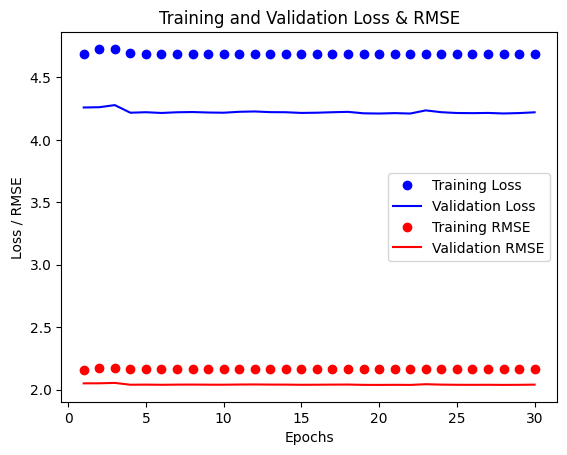

In [ ]:
def plot_loss_and_rmse(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    rmse = history.history['root_mean_squared_error']
    val_rmse = history.history['val_root_mean_squared_error']

    epochs = range(1, len(loss) + 1)

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.plot(epochs, rmse, 'ro', label='Training RMSE')
    plt.plot(epochs, val_rmse, 'r', label='Validation RMSE')
    plt.title('Training and Validation Loss & RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('Loss / RMSE')
    plt.legend()
    plt.show()

# Assuming you have trained the model and have the 'history' object
plot_loss_and_rmse(history)

In [ ]:
load_model1 = load_model('lstm_model1.h5', custom_objects={'root_mean_squared_error': root_mean_squared_error})

In [ ]:
load_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            81920     
                                                                 
 dropout (Dropout)           (None, 1, 128)            0         
                                                                 
 batch_normalization (BatchN  (None, 1, 128)           512       
 ormalization)                                                   
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

# LSTM 2

In [ ]:
log_dir = './Models/'
os.makedirs(log_dir, exist_ok=True)  # Create the directory if it doesn't exist

log_file = os.path.join(log_dir, 'LSTM_model2.log')

In [ ]:
model2_log = tf.keras.callbacks.CSVLogger(log_file)

In [ ]:
tensorboard_callback_2 = tf.keras.callbacks.TensorBoard(log_dir='./Models/LSTM_2')

In [ ]:
lstm_model2 = Sequential()

lstm_model2.add(LSTM(128, return_sequences=True))
lstm_model2.add(BatchNormalization())
lstm_model2.add(Dropout(0.2))

lstm_model2.add(LSTM(64, return_sequences=False))
lstm_model2.add(BatchNormalization())
lstm_model2.add(Dropout(0.2))

lstm_model2.add(Dense(10, activation= 'relu'))
lstm_model2.add(BatchNormalization())
lstm_model2.add(Dropout(0.2))
lstm_model2.add(Dense(1, activation='linear'))

lstm_model2.build(input_shape=(None, 1, 31))
lstm_model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 128)            81920     
                                                                 
 batch_normalization_18 (Bat  (None, 1, 128)           512       
 chNormalization)                                                
                                                                 
 dropout_18 (Dropout)        (None, 1, 128)            0         
                                                                 
 lstm_13 (LSTM)              (None, 64)                49408     
                                                                 
 batch_normalization_19 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_19 (Dropout)        (None, 64)               

In [ ]:
lstm_model2.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
cp2 = ModelCheckpoint('LSTM_MODEL2/', save_best_only=True)

## Model Training

In [ ]:
history2 = lstm_model2.fit(train_daily_x, train_daily_y,
                    batch_size=500,
                    epochs=30,
                    validation_split=0.2,
                    verbose=1,
                    validation_data=(x_val, y_val),
                     callbacks = [cp2, model2_log, tensorboard_callback_2])

Epoch 1/30
13667/13668 [============================>.] - ETA: 0s - loss: 7.1069 - root_mean_squared_error: 2.6659

13668/13668 [==============================] - 219s 16ms/step - loss: 7.1069 - root_mean_squared_error: 2.6659 - val_loss: 3.5430 - val_root_mean_squared_error: 1.8823
Epoch 2/30
13668/13668 [==============================] - 159s 12ms/step - loss: 4.1567 - root_mean_squared_error: 2.0388 - val_loss: 3.5782 - val_root_mean_squared_error: 1.8916
Epoch 3/30
13668/13668 [==============================] - 153s 11ms/step - loss: 4.1190 - root_mean_squared_error: 2.0295 - val_loss: 4.2425 - val_root_mean_squared_error: 2.0597
Epoch 4/30
13668/13668 [==============================] - 152s 11ms/step - loss: 4.0622 - root_mean_squared_error: 2.0155 - val_loss: 3.7183 - val_root_mean_squared_error: 1.9283
Epoch 5/30
13668/13668 [==============================] - 152s 11ms/step - loss: 4.0643 - root_mean_squared_error: 2.0160 - val_loss: 3.7940 - val_root_mean_squared_error: 1.9478
Epoch 6/30
13668/13668 [==============================] - 151s 11ms/step - loss: 4.0486 - root_mean_squared_error: 2

## Saving Model

In [ ]:
# Already saved in my drive, so I do not need to run it again.
# lstm_model2.save('./Models/lstm_model2.h5')

# LSTM 3

In [ ]:
log_dir = './Models/'
os.makedirs(log_dir, exist_ok=True)  # Create the directory if it doesn't exist

log_file = os.path.join(log_dir, 'LSTM_model3.log')

In [ ]:
model3_log = tf.keras.callbacks.CSVLogger(log_file)

In [ ]:
tensorboard_callback_3 = tf.keras.callbacks.TensorBoard(log_dir='./Models/LSTM_3')

In [ ]:
lstm_model3 = Sequential()

lstm_model3.add(LSTM(128, return_sequences=True))
lstm_model3.add(BatchNormalization())
lstm_model3.add(Dropout(0.2))

lstm_model3.add(LSTM(64, return_sequences=False))
lstm_model3.add(BatchNormalization())
lstm_model3.add(Dropout(0.2))

lstm_model3.add(Dense(8, activation= 'relu'))
lstm_model3.add(BatchNormalization())
lstm_model3.add(Dropout(0.2))
lstm_model3.add(Dense(1, activation='linear'))

lstm_model3.build(input_shape=(None, 1, 31))
lstm_model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 128)            81920     
                                                                 
 batch_normalization_3 (Batc  (None, 1, 128)           512       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 64)               

In [ ]:
lstm_model3.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
cp3 = ModelCheckpoint('LSTM_MODEL3/', save_best_only=True)

## Model training

In [ ]:
# It was previously named history2 (by mistake), so I renamed it as history 3 after completing the training
history3 = lstm_model3.fit(train_x_scaled_3D, train_daily_y, batch_size=500, epochs=15, validation_split=0.2, verbose=1, validation_data=(x_val, y_val), callbacks = [cp3, model3_log, tensorboard_callback_3])

Epoch 1/15
21354/21355 [============================>.] - ETA: 0s - loss: 5.2654 - root_mean_squared_error: 2.2946

21355/21355 [==============================] - 296s 14ms/step - loss: 5.2653 - root_mean_squared_error: 2.2946 - val_loss: 2.5608 - val_root_mean_squared_error: 1.6002
Epoch 2/15
21354/21355 [============================>.] - ETA: 0s - loss: 2.7488 - root_mean_squared_error: 1.6580

21355/21355 [==============================] - 295s 14ms/step - loss: 2.7488 - root_mean_squared_error: 1.6580 - val_loss: 2.4116 - val_root_mean_squared_error: 1.5529
Epoch 3/15
21355/21355 [==============================] - ETA: 0s - loss: 2.5328 - root_mean_squared_error: 1.5915

21355/21355 [==============================] - 287s 13ms/step - loss: 2.5328 - root_mean_squared_error: 1.5915 - val_loss: 2.3891 - val_root_mean_squared_error: 1.5457
Epoch 4/15
21355/21355 [==============================] - ETA: 0s - loss: 2.4139 - root_mean_squared_error: 1.5537

21355/21355 [==============================] - 285s 13ms/step - loss: 2.4139 - root_mean_squared_error: 1.5537 - val_loss: 2.3011 - val_root_mean_squared_error: 1.5169
Epoch 5/15
21351/21355 [============================>.] - ETA: 0s - loss: 2.3227 - root_mean_squared_error: 1.5240

21355/21355 [==============================] - 283s 13ms/step - loss: 2.3226 - root_mean_squared_error: 1.5240 - val_loss: 2.2072 - val_root_mean_squared_error: 1.4857
Epoch 6/15
21353/21355 [============================>.] - ETA: 0s - loss: 2.2540 - root_mean_squared_error: 1.5013

21355/21355 [==============================] - 283s 13ms/step - loss: 2.2540 - root_mean_squared_error: 1.5013 - val_loss: 2.1911 - val_root_mean_squared_error: 1.4802
Epoch 7/15
21352/21355 [============================>.] - ETA: 0s - loss: 2.2035 - root_mean_squared_error: 1.4844

21355/21355 [==============================] - 282s 13ms/step - loss: 2.2036 - root_mean_squared_error: 1.4844 - val_loss: 2.1169 - val_root_mean_squared_error: 1.4549
Epoch 8/15
21355/21355 [==============================] - 272s 13ms/step - loss: 2.1618 - root_mean_squared_error: 1.4703 - val_loss: 2.1378 - val_root_mean_squared_error: 1.4621
Epoch 9/15
21351/21355 [============================>.] - ETA: 0s - loss: 2.1274 - root_mean_squared_error: 1.4586

21355/21355 [==============================] - 283s 13ms/step - loss: 2.1274 - root_mean_squared_error: 1.4586 - val_loss: 2.0525 - val_root_mean_squared_error: 1.4326
Epoch 10/15
21354/21355 [============================>.] - ETA: 0s - loss: 2.0969 - root_mean_squared_error: 1.4481

21355/21355 [==============================] - 282s 13ms/step - loss: 2.0969 - root_mean_squared_error: 1.4481 - val_loss: 1.9661 - val_root_mean_squared_error: 1.4022
Epoch 11/15
21355/21355 [==============================] - 271s 13ms/step - loss: 2.0692 - root_mean_squared_error: 1.4385 - val_loss: 1.9824 - val_root_mean_squared_error: 1.4080
Epoch 12/15
21355/21355 [==============================] - 271s 13ms/step - loss: 2.0443 - root_mean_squared_error: 1.4298 - val_loss: 1.9664 - val_root_mean_squared_error: 1.4023
Epoch 13/15
21355/21355 [==============================] - ETA: 0s - loss: 2.0219 - root_mean_squared_error: 1.4219

21355/21355 [==============================] - 282s 13ms/step - loss: 2.0219 - root_mean_squared_error: 1.4219 - val_loss: 1.9606 - val_root_mean_squared_error: 1.4002
Epoch 14/15
21355/21355 [==============================] - 270s 13ms/step - loss: 2.0001 - root_mean_squared_error: 1.4142 - val_loss: 1.9766 - val_root_mean_squared_error: 1.4059
Epoch 15/15
21351/21355 [============================>.] - ETA: 0s - loss: 1.9767 - root_mean_squared_error: 1.4060

21355/21355 [==============================] - 279s 13ms/step - loss: 1.9767 - root_mean_squared_error: 1.4060 - val_loss: 1.9232 - val_root_mean_squared_error: 1.3868


## Saving Model

In [ ]:
# Already saved in my drive, so I do not need to run it again.
# lstm_model3.save('./Models/lstm_model3.h5')

# Reload Models

In [ ]:
# Reload MODEL 2
load_lstm_model2 = load_model('./Models/lstm_model2.h5') # Used for predict()
lstm2_log_file = pd.read_csv('./Models/LSTM_model2.log') # Load file into csv (epochs, loss, rmse, val_loss, etc..)

In [11]:
# Reload MODEL 3
load_lstm_model3 = load_model('./Models/lstm_model3.h5') # Used for predict()
lstm3_log_file = pd.read_csv('./Models/LSTM_model3.log') # Load file into csv (epochs, loss, rmse, val_loss, etc..)

In [ ]:
lstm3_log_file

# Model 3 Learning Curves (Best Performance)

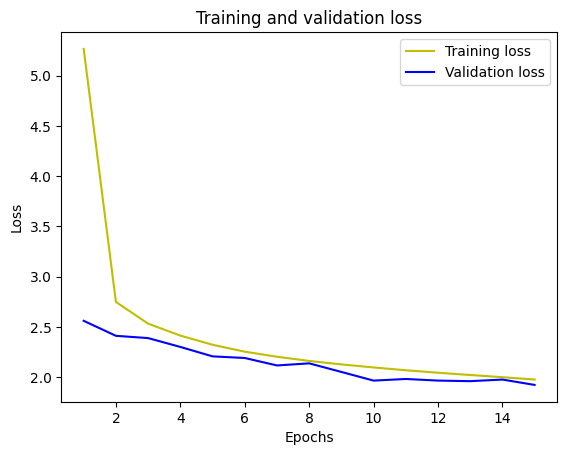

In [17]:
# Access the loss values from the lstm3_log_file DataFrame
loss_values = lstm3_log_file['loss'].values
val_loss_values = lstm3_log_file['val_loss'].values
epochs = lstm3_log_file['epoch'].values

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'y', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

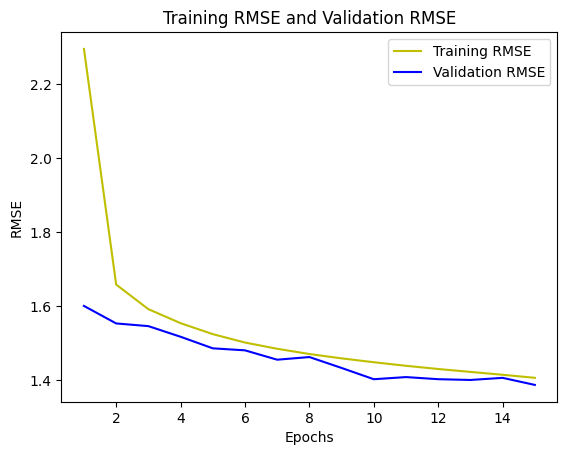

In [18]:
# Access the loss values from the lstm3_log_file DataFrame
rmse_values = lstm3_log_file['root_mean_squared_error'].values
val_rmse_values = lstm3_log_file['val_root_mean_squared_error'].values
epochs = lstm3_log_file['epoch'].values

epochs = range(1, len(rmse_values) + 1)
plt.plot(epochs, rmse_values, 'y', label='Training RMSE')
plt.plot(epochs, val_rmse_values, 'b', label='Validation RMSE')
plt.title('Training RMSE and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Making Predictions

In [62]:
# Predict using MODEL 2
predictions_2 = loaded_lstm_model2.predict(test_daily_x)

214119/214119 [==============================] - 481s 2ms/step


In [14]:
# Predict using MODEL 3
predictions_3 = load_lstm_model3.predict(test_x_scaled_3D)

214119/214119 [==============================] - 485s 2ms/step


Create a dataframe with Model 2 predictions test results

In [ ]:
# Create a dataframe with the test results of model 2
test_results_2 = pd.DataFrame()
test_results_2 = pd.concat([test_results_2, test_daily_x[['building_id', 'site_id', 'meter', 'hour', 'day', 'month']]], axis=1)
test_results_2['meter_reading_actual_values'] = test_daily_y
test_results_2['meter_reading_predicted_values'] = predictions_2

Create a dataframe with Model 3 predictions test results

In [15]:
# Create a dataframe with the test results of model 3
test_results_3 = pd.DataFrame()
test_results_3 = pd.concat([test_results_3, test_daily_x[['building_id', 'site_id', 'meter', 'hour', 'day', 'month']]], axis=1)
test_results_3['actual_values'] = test_daily_y
test_results_3['predicted_values'] = predictions_3

In [16]:
test_results_3

,building_id,site_id,meter,hour,day,month,actual_values,predicted_values
0,0,0,0,0,1,9,4.331021,4.097044
1,1,0,0,0,1,9,3.746486,3.248057
2,2,0,0,0,1,9,1.818324,2.758704
3,3,0,0,0,1,9,4.821378,4.894731
4,4,0,0,0,1,9,6.138452,5.971176
...,...,...,...,...,...,...,...,...
6851784,1444,15,0,23,31,12,2.277267,2.276962
6851785,1445,15,0,23,31,12,1.762159,2.312309
6851786,1446,15,0,23,31,12,0.000000,1.874131
6851787,1447,15,0,23,31,12,5.078761,3.131851


Plotting the predicted values vs actual values for a year

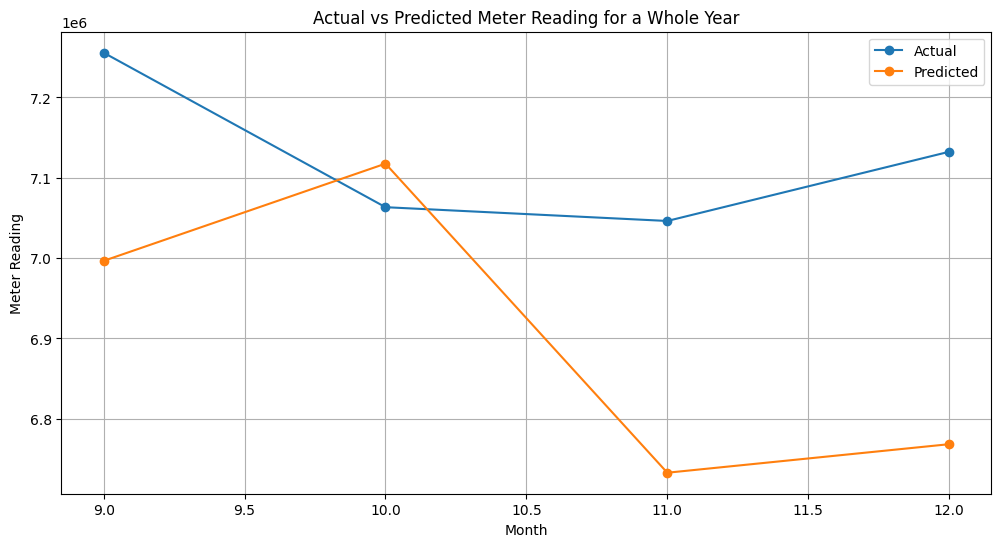

In [54]:
# Extract the required columns from test_results_3
# Aggregate the actual and predicted values by month
actual_monthly = test_results_3.groupby('month')['actual_values'].sum()
predicted_monthly = test_results_3.groupby('month')['predicted_values'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(actual_monthly, marker='o', label='Actual')
plt.plot(predicted_monthly, marker='o', label='Predicted')
plt.xlabel('Month')
plt.ylabel('Meter Reading')
plt.title('Actual vs Predicted Meter Reading for a Whole Year')
plt.legend()
plt.grid(True)
plt.show()

# Model Evaluation Using Test Set (Predicted Values)

In [18]:
# Calculating and Printing MAE for Model 1, 2 and 3
mae_2 = mean_absolute_error(test_daily_y, predictions_2)
mae_3 = mean_absolute_error(test_daily_y, predictions_3)

print("Mean Absolute Error (MAE) for model 2: ", mae_2)
print("Mean Absolute Error (MAE) for model 3: ", mae_3)

Mean Absolute Error (MAE): 1.1333987059157313


In [28]:
#Calculating and printing R^2 for Model 1, 2 and 3
r2_2 = r2_score(test_daily_y, predictions_2)
r2_3 = r2_score(test_daily_y, predictions_3)

print("Coefficient of Determination (R^2):", r2_2)
print("Coefficient of Determination (R^2):", r2_3)

Coefficient of Determination (R^2): 0.3822797579832816


In [ ]:
# Creating a function for MAPE
# Added a small epsilon value because the test_daily_y (y_true) has zero values
def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-7  # Small epsilon value
    percentage_errors = np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), epsilon))
    mape = np.mean(percentage_errors) * 100
    return mape

In [38]:
mape2 = mean_absolute_percentage_error(test_daily_y, predictions_2)
mape3 = mean_absolute_percentage_error(test_daily_y, predictions_3)

print("Mean Absolute Percentage Error for model 2: ", mape2)
print("Mean Absolute Percentage Error for model 3: ", mape3)

MAPE: meter_reading_log1p    2.360180e+08
dtype: float64


In [57]:
# Calculating MSE and RMSE, printing BOTH for model 1, 2 and 3
import math 

# Mean Squared Error
mse2 = mean_squared_error(test_results_2['actual_values'], test_results_2['predicted_values'])
mse3 = mean_squared_error(test_results_3['actual_values'], test_results_3['predicted_values'])

# Root Mean Squared Error (RMSE)
rmse2 = math.sqrt(mse2)
rmse3 = math.sqrt(mse3)

print("The Root Mean Squared Error for model 2: ", rmse2)
print("The Root Mean Squared Error for model 3: ", rmse3)

The Root Mean Squared Error is:  1.4059686660766602
